In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state= 1000

In [3]:
df = pd.read_csv("Mall_Customers.csv", index_col='CustomerID')

df['Genre'].replace({'Male':1, 'Female':0}, inplace=True)

df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [4]:
X = df.drop('Spending Score (1-100)', axis=1)

spendingScore = df['Spending Score (1-100)']

### 1. Import the pca Python package and define your model with 3 principal components

In [5]:
from pca import pca

In [6]:
pca()

In [7]:
model=pca(n_components=3, normalize=True) 

### 2. Fit the model and report the PC loadings and PC scores.

In [8]:
results = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [3] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [9]:
results

{'loadings':         Genre       Age  Annual Income (k$)
 PC1  0.732834  0.505724            0.455191
 PC2  0.011866 -0.678394            0.734602
 PC3  0.680304 -0.532940           -0.503151,
 'PC':           PC1       PC2       PC3
 1   -0.685267 -0.297666  2.401676
 2   -0.612678 -0.395038  2.325181
 3   -2.107933 -0.342218  0.973711
 4   -1.999051 -0.488276  0.858969
 5   -1.691324 -0.849726  0.533785
 ..        ...       ...       ...
 196  0.243413  1.843582 -1.597318
 197  0.710600  1.524957 -2.095021
 198  1.715112  2.181781 -0.227294
 199  1.906230  2.490214 -0.438548
 200  1.833642  2.587586 -0.362054
 
 [200 rows x 3 columns],
 'explained_var': array([0.35901415, 0.69646769, 1.        ]),
 'variance_ratio': array([0.35901415, 0.33745354, 0.30353231]),
 'model': PCA(n_components=3),
 'scaler': StandardScaler(),
 'pcp': 0.9999999999999998,
 'topfeat':     PC             feature   loading  type
 0  PC1               Genre  0.732834  best
 1  PC2  Annual Income (k$)  0.734602  b

In [10]:
loadings=results['loadings']
loadings

,Genre,Age,Annual Income (k$)
PC1,0.732834,0.505724,0.455191
PC2,0.011866,-0.678394,0.734602
PC3,0.680304,-0.532940,-0.503151


In [11]:
scores=results['PC']
scores['Spending Score']=spendingScore
scores.head()

,PC1,PC2,PC3,Spending Score
1,-0.685267,-0.297666,2.401676,39
2,-0.612678,-0.395038,2.325181,81
3,-2.107933,-0.342218,0.973711,6
4,-1.999051,-0.488276,0.858969,77
5,-1.691324,-0.849726,0.533785,40


### 3. Report the cumulative proportion variance explained (PVE) for each principal component

not sure how to do this

### 4. Scree plot: Plot the scree plot and interpret what you see

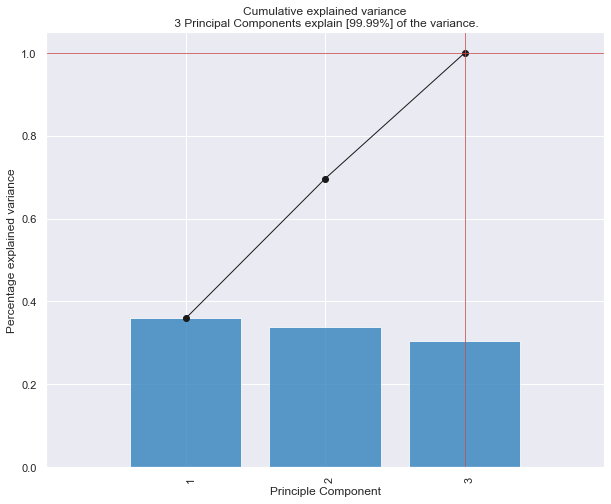

<Figure size 432x288 with 0 Axes>

In [13]:
model.plot(figsize=(10,8))
plt.show()

### 5. Biplot: Plot the biplot with two features only and interpret what you see

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [84] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [84] unique colors! Available unique colors: [9].


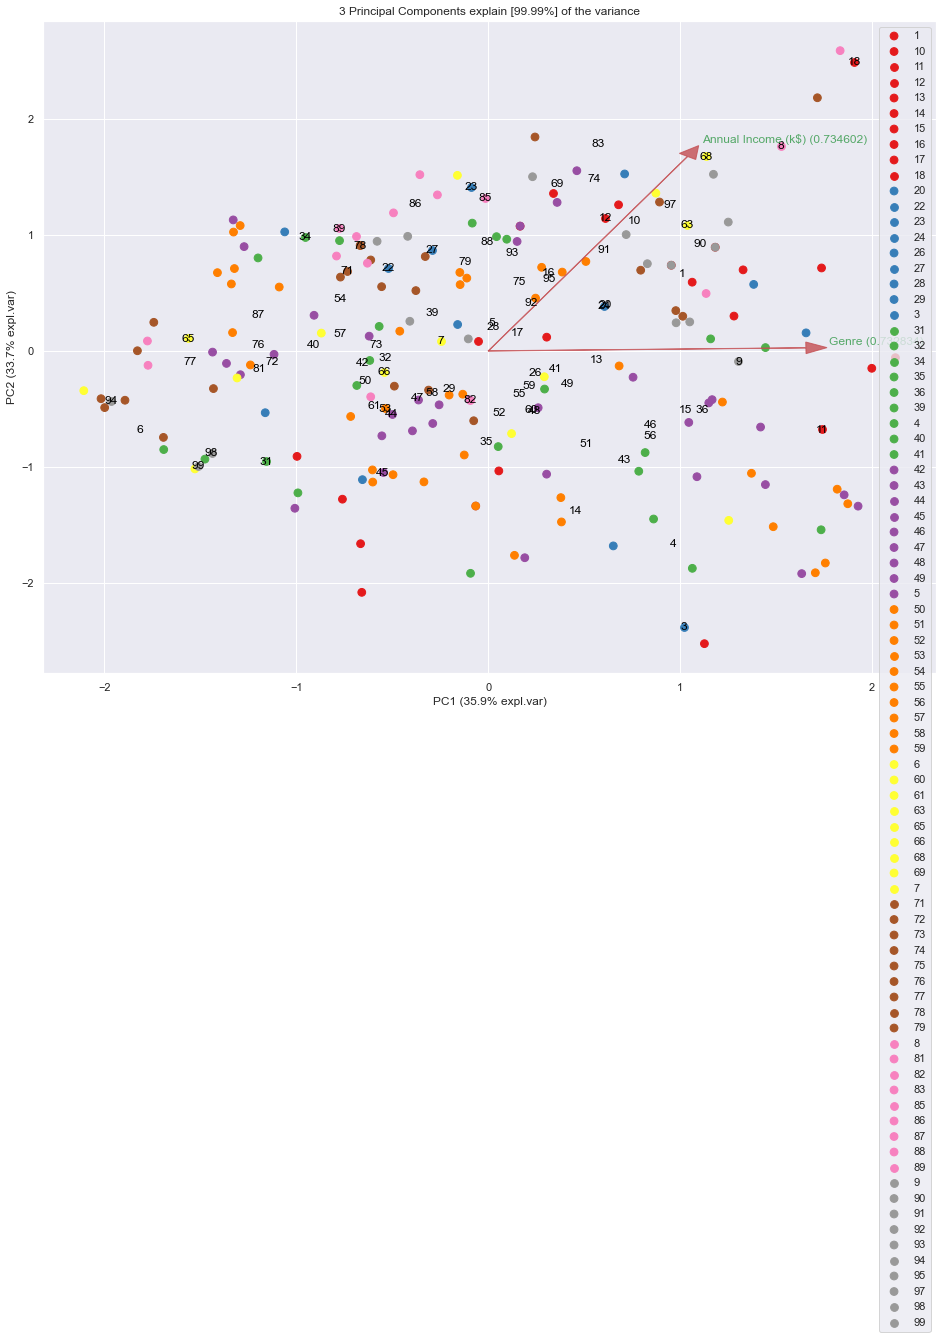

In [16]:
model.biplot(n_feat=2 , legend=True, figsize=(16,12), y=spendingScore , label=True)
plt.show()

### 6. From the biplot you visualized in part 4, how many customer segments do you recommend to the management team

The biplot above creates 9 different groups to place the customers into, which would be the recommended amount from our analysis here. 